# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

Вы научитесь:

* читать тексты из файла с помощью Python и разбивать их на слова
* переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
* решать системы линейных уравнений
* приближать любые функции с помощью многочленов

## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

## Материалы

* Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html
* Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files
* Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Инструкция по выполнению

Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

### Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих

Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции `lower()`.
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: `re.split('[^a-z]', t)`. Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 254 * 22.
6. Найдите косинусное расстояние от первого предложения до всех остальных с помощью функции `scipy.spatial.distance.cosine`. Какие номера у двух предложений, ближайших к нулевому по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

### Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

`f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)`

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть `w_0 + w_1 x + w_2 x^2 + ... + w_n x^n`) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/bmeDb8qaEeWIbRLLM97hpQ_1ee42b8df691206b152a42ad0cee8897_image00.gif?expiry=1455408000000&hmac=HZWim8_FNyJulGIMqc95oqAp8EmfFcfJpvtG4ZATqrI)

где через x_1, ..., x_n обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).


## Решение Задачи 1



Подгружаем данные и библиотеки:

In [3]:
import re
import numpy as np
import scipy.spatial 

#Преобразуем документ в список, где каждый элемент - предложение из документа
txt = []

for line in open('sentences.txt'):
    txt.append(line.strip())
    
print(txt) 

['In comparison to dogs, cats have not undergone major changes during the domestication process.', 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.', 'A common interactive use of cat for a single file is to output the content of a file to standard output.', 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.', 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.', 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.', 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).', 'However, if the output is piped or redirected, cat is unnecessary.', 'cat with one named file is safer where human error is a conc

Приводим все в нижний регистр и дробим на слова (чистим от пустых слов вида ''):

In [4]:
txt_lower = [x.lower() for x in txt]

print(txt_lower[:2]) 

tockens = []

for line in txt_lower:
    new_line = []
    for word in re.split('[^a-z]', line):
        if word != '':
            new_line.append(word)
    tockens.append(new_line) 

print(tockens[:2])

['in comparison to dogs, cats have not undergone major changes during the domestication process.', 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.']
[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']]


Образуем словарь всех слов и рассчитываем word frequency matrix:

In [5]:
all_words = []

for line in tockens:
    for word in line:
        if word not in all_words:
            all_words.append(word)

print(all_words[:11]) 
len(all_words)  

words_dictionary = dict(zip(range(0, len(all_words)), all_words))

#Нулевая матрица размерности количество предложений * количество уникальных слов [22, 254]
words_mtrx = np.zeros((len(txt_lower), len(words_dictionary))) 

for ind in range(0, len(words_dictionary)):
    word = words_dictionary[ind]
    #print(word)
    line_n = 0
    for line in tockens:
        words_mtrx[line_n, ind] = line.count(word)
        #print([line_n, ind])
        line_n += 1

#Максимальное количество повторений слова в предложении
np.amax(words_mtrx)

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during']


3.0

Расчет косинусных расстояний и выбор наиболее близких предложений:

In [6]:
zero_line = words_mtrx[0,]

distances = []

for row in words_mtrx[1:, ]:
    distances.append(scipy.spatial.distance.cosine(zero_line, row))

print(0, txt[0])
for d in distances:
    if d in sorted(distances)[0:2]:
        print(distances.index(d)+1, txt[distances.index(d)])

0 In comparison to dogs, cats have not undergone major changes during the domestication process.
4 Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.
6 The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.


## Решение Задачи 2

Определение функции и импорт библиотеки:

In [49]:
import matplotlib.pyplot as plt
import numpy as np
        
def wine_fun(x):
   return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

x = np.arange(0, 16, .1)
y = wine_fun(x)

f(1) и f(15):

In [50]:
M1 = np.array([[1, 1], [1, 15]]) 
v1 = np.array([wine_fun(1), wine_fun(15)]) 

s1 = np.linalg.solve(M1, v1) 

y1 = s1[0] + s1[1]*x

f(1), f(8) и f(15):

In [51]:
M2 = np.array([[1, 1, 1**2], [1, 8, 8**2], [1, 15, 15**2]])
v2 = np.array([wine_fun(1), wine_fun(8), wine_fun(15)])

s2 = np.linalg.solve(M2, v2)

y2 = s2[0] + s2[1]*x + s2[2]*(x**2) 

f(1), f(4), f(10) и f(15):

In [52]:
M3 = np.array([[1, 1, 1**2, 1**3], [1, 4, 4**2, 4**3], [1, 10, 10**2, 10**3], [1, 15, 15**2, 15**3]])
v3 = np.array([wine_fun(1), wine_fun(4), wine_fun(10), wine_fun(15)]) 

s3 = np.linalg.solve(M3, v3)

y3 = s2[0] + s3[1]*x + s3[2]*(x**2) + s3[3]*(x**3) 

График и ответ:

Ответ:  [ 4.36 -1.3   0.19 -0.01] 



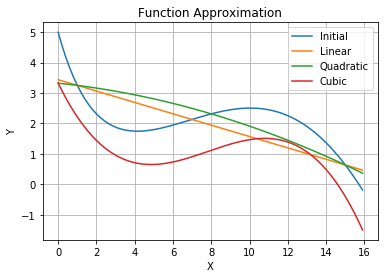

In [54]:
print('Ответ: ', np.around(s3, 2), '\n')

plt.plot(x, y, label='Initial')
plt.plot(x, y1, label = 'Linear')
plt.plot(x, y2, label = 'Quadratic')
plt.plot(x, y3, label = 'Cubic')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function Approximation')
plt.grid(True)
plt.show()